**Flight fare prediction  
Data set downloaded from kaggle**

**Importing all the dependencies**

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
from matplotlib import pyplot as plt 

In [2]:
# The dataset downladed is divided into two
# Training dataset and Test dataset 

train_path = 'Data_Train.xlsx' # Creating a path for the train data
test_path = 'Test_set.xlsx'    # Creating a path for the test data

# Loading the data into Pandas dataFrame and assigning it to variable name train_data and test_data

train_data = pd.read_excel(train_path)
test_data = pd.read_excel(test_path)

In [3]:
# Viewing the first 4 row of the loaded dataset

train_data.head(4) 

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218


In [4]:
# Getting some insights about the data

train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
# Checking for null values in the data

train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

**Data Preprocessing**

In [6]:
# Dropping the null values in the data


train_data.dropna(inplace=True)
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [7]:
# From the data set, the ['Date_of_Journey'] column is in d/m/y format.
# hence, separating the day, and month into a different column

train_data['Day_of_journey'] = pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.day
train_data['Month_of_journey'] = pd.to_datetime(train_data['Date_of_Journey'],format='%d/%m/%Y').dt.month

# Spliting the departure hour and departure minute and storing in a new column each 

train_data['Depature_hour'] = pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Departure_minute'] = pd.to_datetime(train_data['Dep_Time']).dt.minute


# Spliting the Arrival hour and Arrival minute and storing in a new column each 

train_data['Arrival_in_hours'] = pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_in_minute'] = pd.to_datetime(train_data['Arrival_Time']).dt.minute

In [8]:
# dropping the 'Date_of_Journey','Dep_Time','Arrival_Time','Additional_Info' columns 

train_data.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time','Additional_Info'],axis=1,inplace=True)

In [9]:
# checking if splitted and dropped sucessfully 

train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Day_of_journey,Month_of_journey,Depature_hour,Departure_minute,Arrival_in_hours,Arrival_in_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,1,5,5,50,13,15


In [10]:
# saving the the [duration] columns into a variable name series and coverting it to timedelta

series =pd.to_timedelta(train_data['Duration'])

# splitting the hours and minutes compenent 

train_data['Duration_hours']=series.dt.components['hours']
train_data['Duration_minutes']=series.dt.components['minutes']

In [11]:
# Checking if spillting was successful

train_data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Day_of_journey,Month_of_journey,Depature_hour,Departure_minute,Arrival_in_hours,Arrival_in_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,7662,1,5,5,50,13,15,7,25


In [12]:
# From the output below, it could be observedd that both [route] and [total stops] coulmns is about the same information 
# the route dsplays the total stops 

print(train_data['Route'][0:4])
print(train_data['Total_Stops'][0:4])

0                BLR → DEL
1    CCU → IXR → BBI → BLR
2    DEL → LKO → BOM → COK
3          CCU → NAG → BLR
Name: Route, dtype: object
0    non-stop
1     2 stops
2     2 stops
3      1 stop
Name: Total_Stops, dtype: object


In [13]:
# Dropping the [Duration and route] columns 

train_data.drop(columns=['Duration','Route'],axis=1,inplace=True)

In [14]:
# Checking if successfully dropped 

train_data.head(3)

,Airline,Source,Destination,Total_Stops,Price,Day_of_journey,Month_of_journey,Depature_hour,Departure_minute,Arrival_in_hours,Arrival_in_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0


**Using Data Visualiztion to get some insight sabout the data**

In [15]:
import warnings
warnings.filterwarnings('ignore')
sns.set()

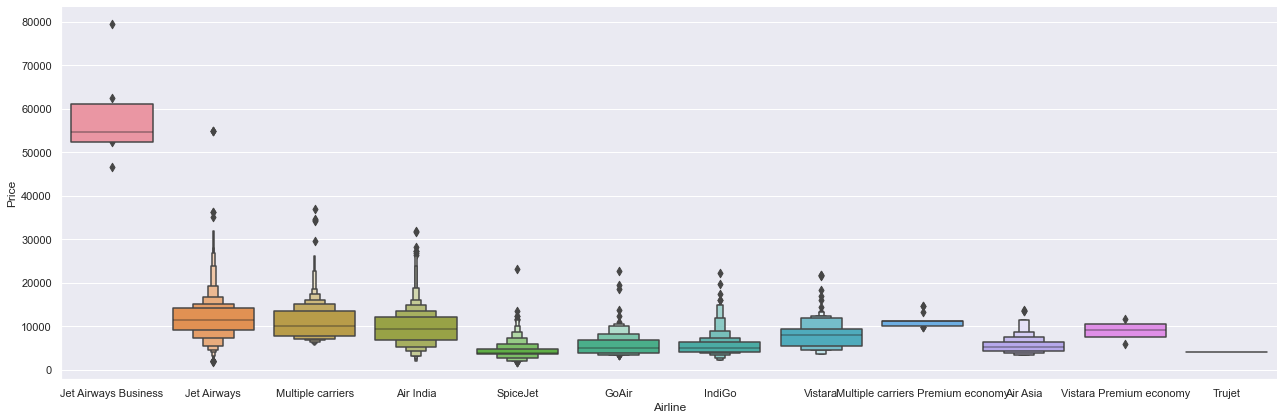

In [16]:
# Using categorical plot to see how Airline is related to price.

sns.catplot(y = 'Price', x = 'Airline',data=train_data.sort_values('Price', ascending=False), height = 6, kind = 'boxen',aspect = 3)
plt.show()

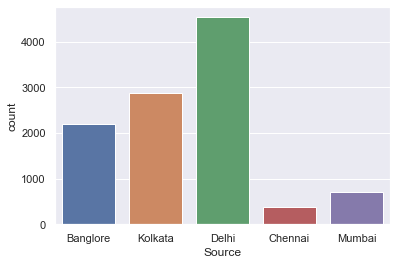

In [17]:
# Counting the unique elements in the [source] coulumn
sns.countplot(train_data['Source'])
plt.show(' ')

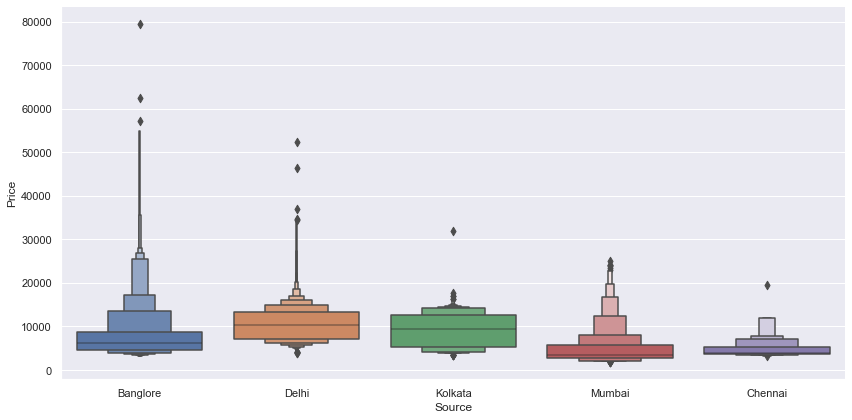

In [18]:
# Using categorical plot to see how Source is affected by price.

sns.catplot(y = 'Price', x = 'Source',data=train_data.sort_values('Price', ascending=False), height = 6, kind = 'boxen',aspect = 2)
plt.show()

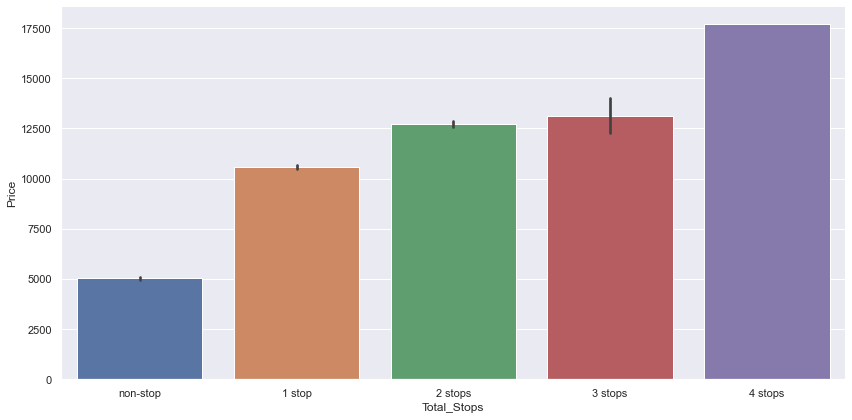

In [19]:
# Using categorical plot to see how Total-stop  affects price.

sns.catplot(y = 'Price', x = 'Total_Stops',data=train_data.sort_values('Price', ascending=True), height = 6, kind = 'bar',aspect = 2)
plt.show()

In [20]:
train_data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [21]:
# Creating a dictionary for the categories to be repalced with numerical values

Total_Stops_dictionary = {'non-stop': 0,
                         '1 stop': 1,
                         '2 stops':2,
                         '3 stops':3,
                         '4 stops':4}


# Replacing:

train_data.replace({'Total_Stops':Total_Stops_dictionary},inplace=True)

In [22]:
# Checking if repalced successfully 

train_data.head(3)

,Airline,Source,Destination,Total_Stops,Price,Day_of_journey,Month_of_journey,Depature_hour,Departure_minute,Arrival_in_hours,Arrival_in_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0


In [23]:
# Applying one hot encoding on [Airline] column


Airline = train_data[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline.head(2)

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0


In [24]:
# Applying one hot encoding on [Source] column

Source = train_data[['Source']]
Source = pd.get_dummies(Source,drop_first=True)
Source.head(2)

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0


In [25]:
# Applying one hot encoding on [Destination] column

Destination = train_data[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)
Destination.head(2)

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0


In [26]:
# Merging all the encoded columns to the train data

training_data = pd.concat([train_data,Airline,Source,Destination],axis=1)

In [27]:
# Checking if successfully concatinated 

training_data.head(2)

,Airline,Source,Destination,Total_Stops,Price,Day_of_journey,Month_of_journey,Depature_hour,Departure_minute,Arrival_in_hours,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,...,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,...,0,0,0,1,0,0,0,0,0,0


In [28]:
# Dropping the encoded columns

training_data = training_data.drop(columns=['Airline','Source','Destination'],axis=1)

In [29]:
training_data.head(2)

,Total_Stops,Price,Day_of_journey,Month_of_journey,Depature_hour,Departure_minute,Arrival_in_hours,Arrival_in_minute,Duration_hours,Duration_minutes,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,...,0,0,0,1,0,0,0,0,0,0


In [30]:
training_data.shape

(10682, 30)

**Test data Preprocessing**

In [31]:
test_data.shape

(2671, 10)

In [32]:
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


**Similar preproceesing steps will be applied on the test data**

In [33]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [34]:
test_data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info'],
      dtype='object')

In [35]:
# From the data set, the ['Date_of_Journey'] column is in d/m/y format.
# hence, separating the day, and month into a different column

test_data['Day_of_journey'] = pd.to_datetime(test_data['Date_of_Journey'],format='%d/%m/%Y').dt.day
test_data['Month_of_journey'] = pd.to_datetime(test_data['Date_of_Journey'],format='%d/%m/%Y').dt.month

# Spliting the departure hour and departure minute and storing in a new column each 


test_data['Depature_hour'] = pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Departure_minute'] = pd.to_datetime(test_data['Dep_Time']).dt.minute

# Spliting the Arrival hour and Arrival minute and storing in a new column each 

test_data['Arrival_in_hours'] = pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_in_minute'] = pd.to_datetime(test_data['Arrival_Time']).dt.minute


# Dropping the separated columns 
test_data.drop(columns=['Date_of_Journey','Dep_Time','Arrival_Time','Additional_Info'],axis=1,inplace=True)



In [36]:
# saving the the [duration] columns into a variable name ts(test series) and coverting it to timedelta

ts=pd.to_timedelta(test_data['Duration'])
test_data['Duration_hours']=ts.dt.components['hours']
test_data['Duration_minutes']=ts.dt.components['minutes']

In [37]:
# Dropping the [duration ad route] coulmn

test_data.drop(columns=['Duration','Route'],axis=1,inplace=True)

In [38]:
dictionary = {'non-stop': 0,
             '1 stop': 1,
             '2 stops':2,
             '3 stops':3,
             '4 stops':4}


test_data.replace({'Total_Stops':dictionary},inplace=True)

In [39]:
# APPLYING one hot encoding  

Airline = test_data[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)

Source = test_data[['Source']]
Source = pd.get_dummies(Source,drop_first=True)


Destination = test_data[['Destination']]
Destination = pd.get_dummies(Destination,drop_first=True)

In [40]:
# COncatinating the encoded columns with the test data 

testing_data = pd.concat([test_data,Airline,Source,Destination],axis=1)

In [41]:
testing_data = testing_data.drop(columns=['Airline','Source','Destination'],axis=1)

In [42]:
# cheching if sucessfull

testing_data.head(2)

,Total_Stops,Day_of_journey,Month_of_journey,Depature_hour,Departure_minute,Arrival_in_hours,Arrival_in_minute,Duration_hours,Duration_minutes,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,1,6,6,17,30,4,25,10,55,0,...,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,...,0,0,0,1,0,0,0,0,0,0


In [43]:
testing_data.shape

(2671, 28)

In [44]:
training_data.columns.value_counts().sum()

30

In [45]:
testing_data.columns.value_counts().sum()

28

In [46]:
training_data.columns

Index(['Total_Stops', 'Price', 'Day_of_journey', 'Month_of_journey',
       'Depature_hour', 'Departure_minute', 'Arrival_in_hours',
       'Arrival_in_minute', 'Duration_hours', 'Duration_minutes',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [47]:
# separating the fearures and the targets from the preproccessed data 

features = training_data.loc[:,['Total_Stops','Day_of_journey', 'Month_of_journey',
       'Depature_hour', 'Departure_minute', 'Arrival_in_hours',
       'Arrival_in_minute', 'Duration_hours', 'Duration_minutes',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]

In [48]:
features[0:3]

,Total_Stops,Day_of_journey,Month_of_journey,Depature_hour,Departure_minute,Arrival_in_hours,Arrival_in_minute,Duration_hours,Duration_minutes,Airline_Air India,...,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,...,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,...,0,0,1,0,0,1,0,0,0,0


In [49]:
target = training_data.iloc[:,1]
target[0:3]

0     3897
1     7662
2    13882
Name: Price, dtype: int64

In [50]:
# checking the correlation between the atributes of the traain data 

correlation = train_data.corr()

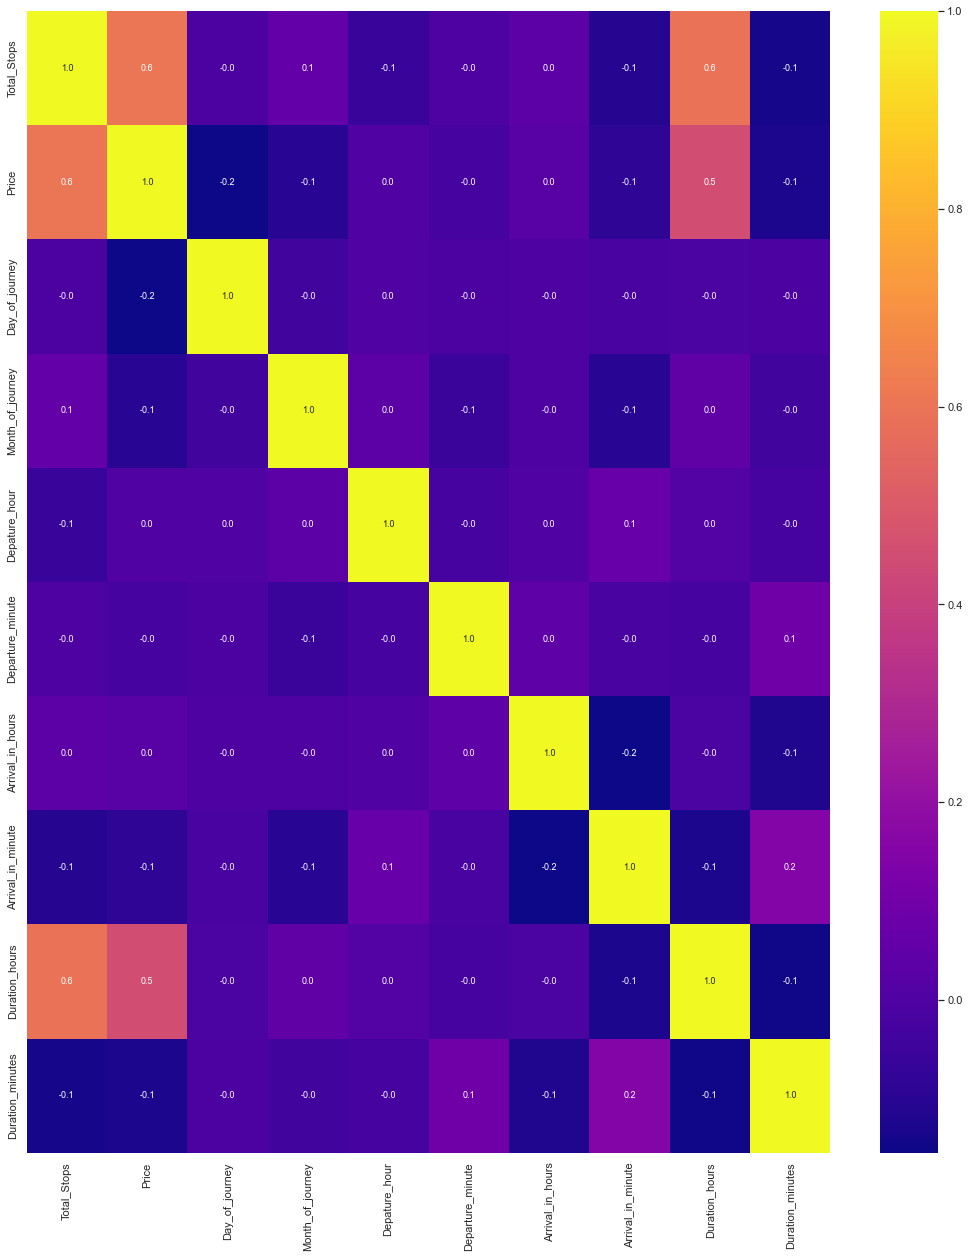

In [51]:
plt.figure(figsize=(18,21))
sns.heatmap(correlation,annot=True,cbar=True,fmt='.1f',annot_kws={'size':9},cmap='plasma')
plt.show(' ')

**Modelling**

In [52]:
# using ExtratreeRegressor for extracting the important features from the train data

from sklearn.ensemble import ExtraTreesRegressor

# Creating a regressor object 

Extra_reg = ExtraTreesRegressor()


# fitting the features and tagert from extraction 


Extra_reg.fit(features,target)

ExtraTreesRegressor()

In [53]:
print(Extra_reg.feature_importances_)

[2.45788240e-01 1.43834196e-01 5.43253382e-02 2.43888183e-02
 2.14193731e-02 2.83162496e-02 1.93912447e-02 8.99600088e-02
 1.73997994e-02 1.11288923e-02 1.96998247e-03 2.35723262e-02
 1.40991626e-01 6.67507248e-02 1.62753227e-02 8.50289942e-04
 3.92529546e-03 1.51514001e-04 5.81452980e-03 8.66679737e-05
 4.43496562e-04 1.31716320e-02 3.60181115e-03 6.98081475e-03
 1.35095905e-02 1.33629413e-02 7.13049062e-03 4.94474444e-04
 2.49643081e-02]


<AxesSubplot:>

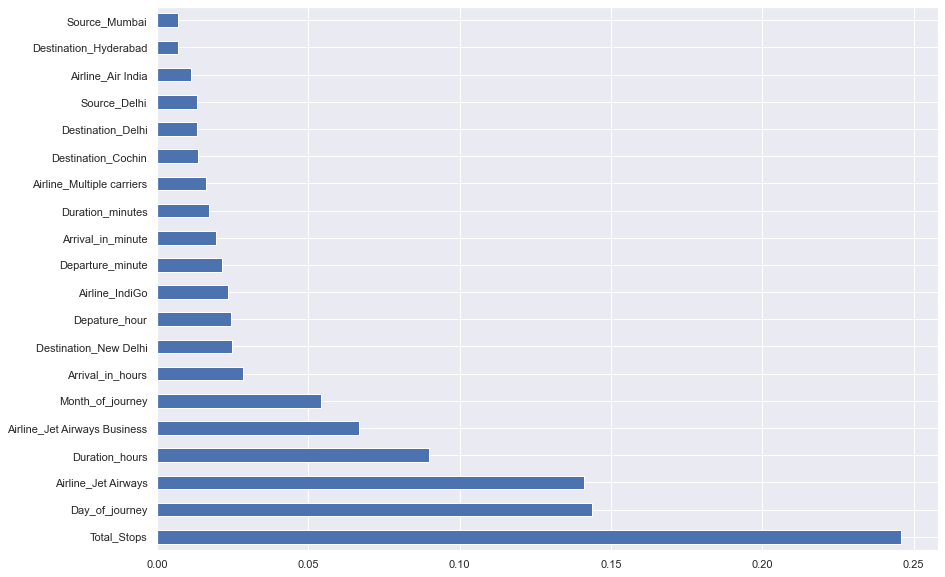

In [54]:
# Plotting the extracted important features 

plt.figure(figsize=(14,10))
feat_importance = pd.Series(Extra_reg.feature_importances_,index=features.columns)
feat_importance.nlargest(20).plot(kind='barh')

In [55]:
# Splitting the data into training and testing 


from sklearn.model_selection import train_test_split

Xtrain,Xtest,Ytrain,Ytest = train_test_split(features,target,test_size=0.2,random_state=2)

In [56]:
# Aplying Randomforest regressor for the model 

from sklearn.ensemble import RandomForestRegressor

random_forest_model = RandomForestRegressor()

random_forest_model.fit(Xtrain,Ytrain)

RandomForestRegressor()

**Model Evaluation**

In [57]:
train_predict = random_forest_model.predict(Xtrain)
test_predict = random_forest_model.predict(Xtest)

In [58]:
from sklearn import metrics
train_score = random_forest_model.score(Xtrain,Ytrain)
print("The training score is :",train_score)

The training score is : 0.9548473773679654


In [59]:
test_score = random_forest_model.score(Xtest,Ytest)
print("The test score is :",test_score)

The test score is : 0.8212304560524885


**Visualizing the model performance**

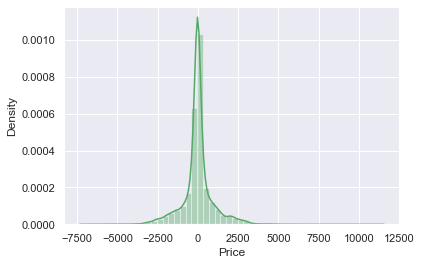

In [60]:
# visualizing the training  predicted and the true values

sns.distplot(Ytrain-train_predict,color='g')
plt.show()

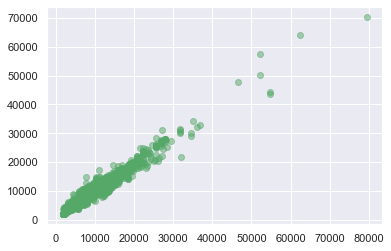

In [61]:
plt.scatter(Ytrain,train_predict, alpha = 0.5, c='g')
plt.xlabel=("Actual")
plt.ylabel=("Predicted")
plt.show(' ')

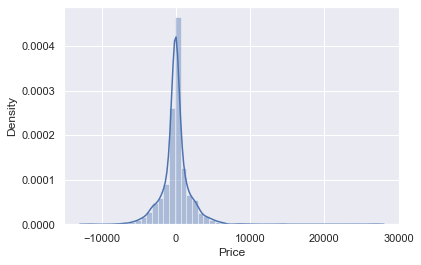

In [62]:
# visualizing the testing  predicted and the true values

sns.distplot(Ytest-test_predict)
plt.show()

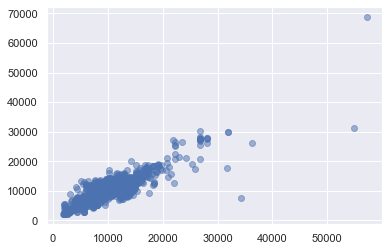

In [63]:
plt.scatter(Ytest,test_predict, alpha = 0.5, c='b')
plt.xlabel=("y_test")
plt.ylabel=("y_pred")
plt.show(' ')

In [64]:
print('MAE :',metrics.mean_absolute_error(Ytest,test_predict))
print('MSE :',metrics.mean_squared_error(Ytest,test_predict))
print('RMSE :',np.sqrt(metrics.mean_squared_error(Ytest,test_predict)))
print('RSE :',metrics.r2_score(Ytest,test_predict))

MAE : 1183.0206040746416
MSE : 3976391.3725951337
RMSE : 1994.0891084891703
RSE : 0.8212304560524885


**Hyper-Parameter Tunning**

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [66]:
# Randomized Search CV

# number of tress in the random forest
n_estimators = [int(x) for x in np.linspace(start=100, stop=1200, num=12)]

# number of features per split 
max_features = ['auto','sqrt']

# Maximum number of level in tree
max_depth = [int(x) for x in np.linspace(5, 30, num=6)]

# Minimum number of samples required to split a node 
min_samples_split = [2, 5, 10, 15, 100]

# Minimum number of samples at each leaf node 
min_samples_leaf = [1, 2, 5, 10]

In [67]:
# Creating a random Grid Dictionary

random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth' : max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf}

In [68]:
# Random search parameters using 5 folds cross validation and, 
# search across 100 combinations 

rand_forest = RandomizedSearchCV(estimator=random_forest_model , param_distributions= random_grid, scoring='neg_mean_squared_error', 
                                 n_iter= 10, cv= 5, verbose= 2, random_state=42, n_jobs=1)

In [69]:
rand_forest.fit(Xtrain,Ytrain)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.8s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  10.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  10.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [70]:
rand_forest.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [71]:
prediction = rand_forest.predict(Xtest)

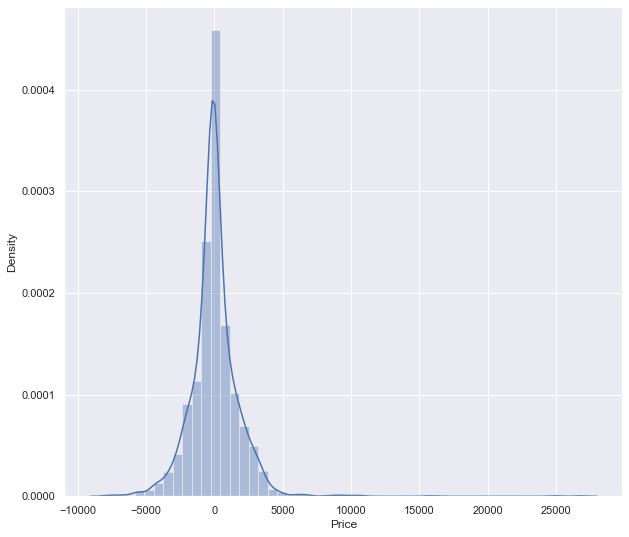

In [72]:
plt.figure(figsize=(10,9))
sns.distplot(Ytest-prediction)
plt.show()

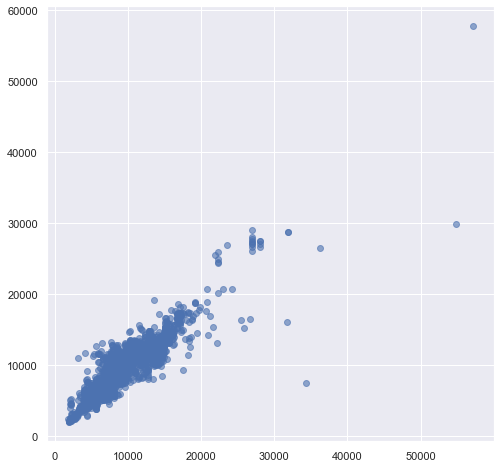

In [73]:
plt.figure(figsize=(8,8))
plt.scatter(Ytest,prediction,alpha=0.6)
#plt.xlabel("Y_test")
#plt.ylabel("Y_pred")
plt.show()

**Thank You!**  
**Olatunde**